In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
#Define agents for customisable payoff matrix

class A:
    """
    Base class for species A
    """
    def __init__(self,age=0,points=0,largest_payoff=0):
        self.name = "A"
        self.age = age
        self.points = points
        self.largest_payoff = largest_payoff
    def interact(self, opponent, payoff_dict):
        self.largest_payoff = max(payoff_dict.values())
        if opponent is None:
            self.points = self.largest_payoff
        elif opponent.name == 'A':
            self.points = payoff_dict.get("a")
        elif opponent.name == 'B':
            self.points = payoff_dict.get("c")
    def dont_starve(self):
        death_chance = random.uniform(0,self.largest_payoff/2)
        if self.points < death_chance:
            return False #death
        else:
            return True  #survival
    def reproduce(self):
        non_reproduction_chance = random.uniform(0,self.largest_payoff/2)
        if (self.points-(self.largest_payoff/2)) < non_reproduction_chance:
            return False
        else:
            return True
    def mortality(self):
        death_chance = random.uniform(0,10)
        if self.age > death_chance:
            return False    #death
        else:
            return True     #survive

class B:
    """
    Base class for species A
    """
    def __init__(self,age=0,points=0,largest_payoff=0):
        self.name = "B"
        self.age = age
        self.points = points
        self.largest_payoff = largest_payoff
    def interact(self, opponent, payoff_dict):
        self.largest_payoff = max(payoff_dict.values())
        if opponent is None:
            self.points = self.largest_payoff
        elif opponent.name == 'A':
            self.points = payoff_dict.get("b")
        elif opponent.name == 'B':
            self.points = payoff_dict.get("d")
    def dont_starve(self):
        death_chance = random.uniform(0,self.largest_payoff/2)
        if self.points < death_chance:
            return False #death
        else:
            return True  #survival
    def reproduce(self):
        non_reproduction_chance = random.uniform(0,self.largest_payoff/2)
        if (self.points-(self.largest_payoff/2)) < non_reproduction_chance:
            return False
        else:
            return True
    def mortality(self):
        death_chance = random.uniform(0,10)
        if self.age > death_chance:
            return False      #death
        else:
            return True       #survive

In [4]:
def run__generalised_generation(creature_list, carrying_capacity, payoff_dict):
    #assign creatures to resource list
    resources_used = 0
    resources = [[] for _ in range(carrying_capacity//2)]
    for creature in creature_list:
        while resources_used < carrying_capacity:
            resource_index = random.randint(0,(carrying_capacity/2)-1)
            resource = resources[resource_index]
            if len(resource) < 2:
                resources[resource_index].append(creature)
                resources_used+=1
                break
            else:
                next

    #allow creatures to interact
    #repopulate creature_list
    creature_list_points_collected = []    #creature list after foraging
    for resource in resources:
        num_creatures = len(resource)
        if num_creatures == 0:
            continue
        creature_a = resource[0]
        if num_creatures == 1:
            creature_b = None  
        else: 
            creature_b = resource[1]
            creature_b.interact(creature_a, payoff_dict)
            creature_list_points_collected.append(creature_b)
        creature_a.interact(creature_b, payoff_dict)
        creature_list_points_collected.append(creature_a)
        
    #determine survival & reproduction
    creature_list = []       #creatures at end of day
    for creature in creature_list_points_collected:
        if creature.dont_starve() == False:
            next
        elif creature.mortality() == False:
            next
        else:
            #print('creature survived')
            creature_list.append(creature)
            if creature.reproduce() == True:
                #print(creature.name, 'reproduced')
                creature_type = type(creature)
                creature_list.append(creature_type())
    for creature in creature_list:
        creature.points = 0      # new day
        creature.age += 0.01   # age by one day
    random.shuffle(creature_list) 
    return(creature_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.94, 0.95, 1.06, 1.03, 0.93, 0.79, 0.68, 0.58, 0.46, 0.37, 0.37, 0.37, 0.35, 0.32, 0.31, 0.29, 0.29, 0.32, 0.31, 0.31, 0.31, 0.32, 0.29, 0.27, 0.28, 0.26, 0.24, 0.24, 0.24, 0.24, 0.22, 0.23, 0.23, 0.24, 0.24, 0.26, 0.25, 0.25, 0.24, 0.23, 0.21, 0.22, 0.21, 0.22, 0.24, 0.26, 0.28, 0.27, 0.27, 0.25, 0.25, 0.25, 0.25, 0.24, 0.24, 0.23, 0.25, 0.25, 0.22, 0.2, 0.21, 0.22, 0.19, 0.19, 0.22, 0.21, 0.2, 0.23, 0.22, 0.24, 0.28, 0.26, 0.26, 0.25, 0.26, 0.25, 0.21, 0.23, 0.26, 0.25, 0.24, 0.23, 0.23, 0.23, 0.26, 0.23, 0.23, 0.2, 0.21, 0.2, 0.2, 0.2, 0.19, 0.17, 0.19]


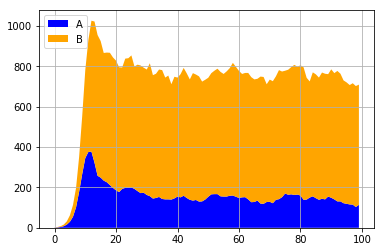

In [5]:
payoff_dict = {
    "a": 1,
    "b": 1.5,
    "c": 0.5,
    "d": 0.4
}

creature_list = []
for i in range(1):
    creature_list.append(A())
    creature_list.append(B())

generation_count = [0]
a_population = []
b_population = []
population_quotient = []
a_population.append(sum(creature.name == 'A' for creature in creature_list))
b_population.append(sum(creature.name == 'B' for creature in creature_list))
if b_population[0] != 0:
    population_quotient = [round(a_population[0]/b_population[0], 2)]

num_generations = 100

for i in range(1,num_generations):
    a_per_gen = 0
    b_per_gen = 0
    creature_list = run__generalised_generation(creature_list, payoff_dict=payoff_dict, carrying_capacity=1000)
    for creature in creature_list:
        if creature.name == 'A':
            a_per_gen += 1
        elif creature.name == 'B':
            b_per_gen += 1
    a_population.append(a_per_gen)
    b_population.append(b_per_gen)
    if b_population[i] != 0:
        population_quotient.append(round(a_population[i]/b_population[i],2))
    generation_count.append(i)

#print(generation_count)
#print(a_population)
#print(b_population)
print(population_quotient)

plt.stackplot(generation_count,a_population,b_population, labels = ['A', 'B'], colors = ['blue', 'orange'], alpha=1)
plt.grid()
plt.legend(loc = 'upper left')
plt.show()